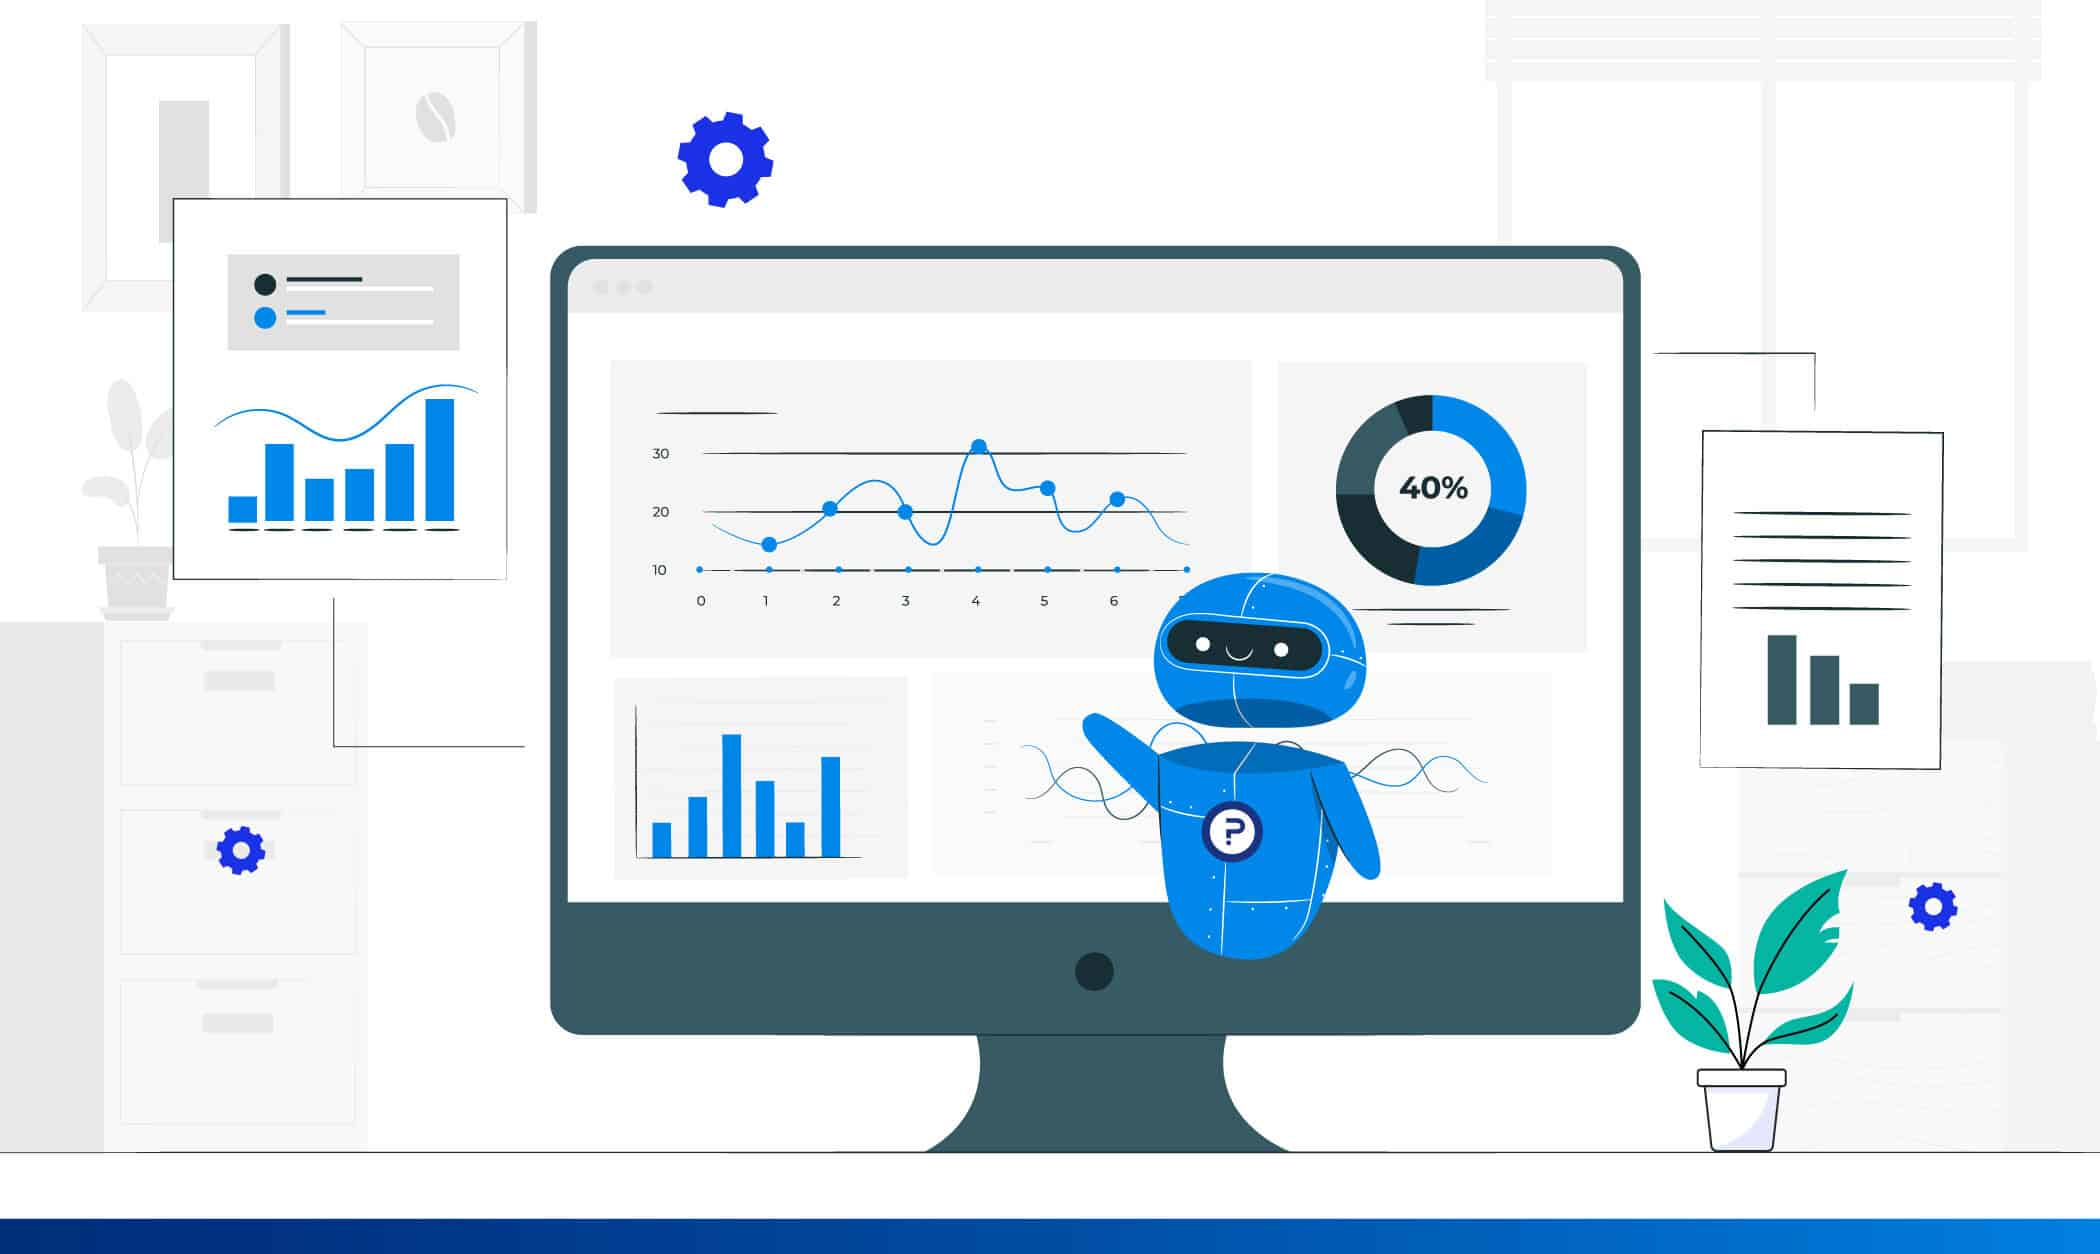

# ¿Por qué un Modelo de Estimación?


- Reduce riezgos asociados con asegurar a un cliente en particular

- Ofrece tarifas competitivas, siguiendo las tendencias del mercado.

- Establece pólizas, términos y condiciones, límites de cobertura y otros aspectos conociendo las características del cliente que elevan los cargos de la tarifa anual.

- Detecta posibles fraudes.

- Identifica distintos segmentos de tus clientes, basados en sus perfiles de riezgos y cargos anuales personaliza estrategias de marketing, promociónes, y canales de comunicación para cada segmento.

- Identifica posibles fugas de clientes, identifica señales de advertencia para implementar estrategías de rentención


### Es importante tener en cuenta que la implementación de modelos de aprendizaje automático requiere una sólida recopilación de datos, consideraciones de privacidad de datos , monitoreo y actualización continua del modelo para garantizar la precisión. 

###  Adicionalmente, el cumplimiento de los marcos regulatorios y lineamientos éticos debe ser una prioridad para mantener la confianza con los clientes y los organismos reguladores.

# ¿Qué datos necesita un modelo?

Datos Orgánicos, fáciles de obtener de tus mismos clientes por medio de cuestionarios u obteniendolos mediante un servicio de obtención y manejo de datos en la nube, pagando una tarifa que varía según el provedor. (Amazón, Microsoft, Google, etc)

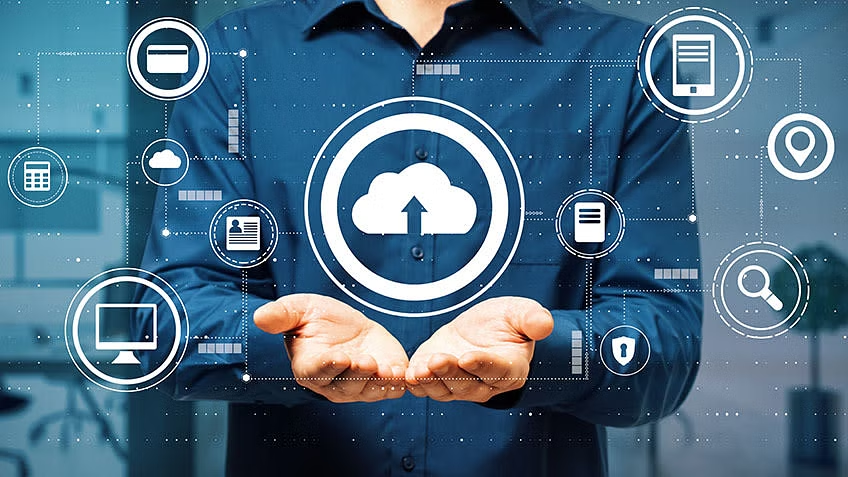

# ¿Es muy caro entrenar un modelo?

Puede ser tan caro como quieras invertir, pero las herramientas principales son hasta el momento de acceso libre y gratuito, ademas de la cantidad de codigo abierto de uso libre que puedes encontrar en internet.


Programación con phyton.

- Python es un lenguaje de código abierto, disponible gratuitamente para su uso y modificación. 

- la simplicidad de phython lo hace un lenguaje accesible tanto para principiantes como para desarrolladores experimentados.

- Rico ecosistema de bibliotecas y Frameworks para análaisis de datos = Trabajo más eficiente.


# ¿Por qué elegirnos a nosotros?


# - Equipo de Data Scientist comprometidos. 


# - Con capacidades de optimizar un modelo que mejore el rendimiento de su compañía.


# - Trabajo transparente con reportes constantes.


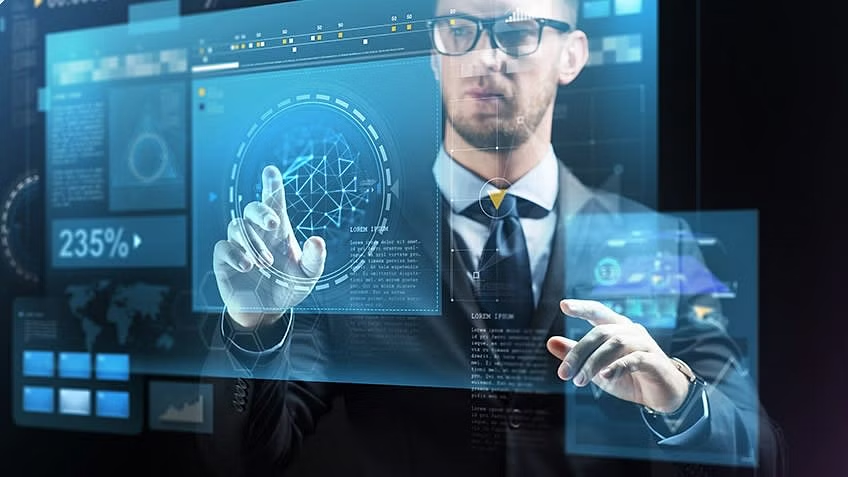

# A Continuación se mostrará un modelo entrenado con datos de entrenamiento. Con el fín de conocer como funciona un modelo.




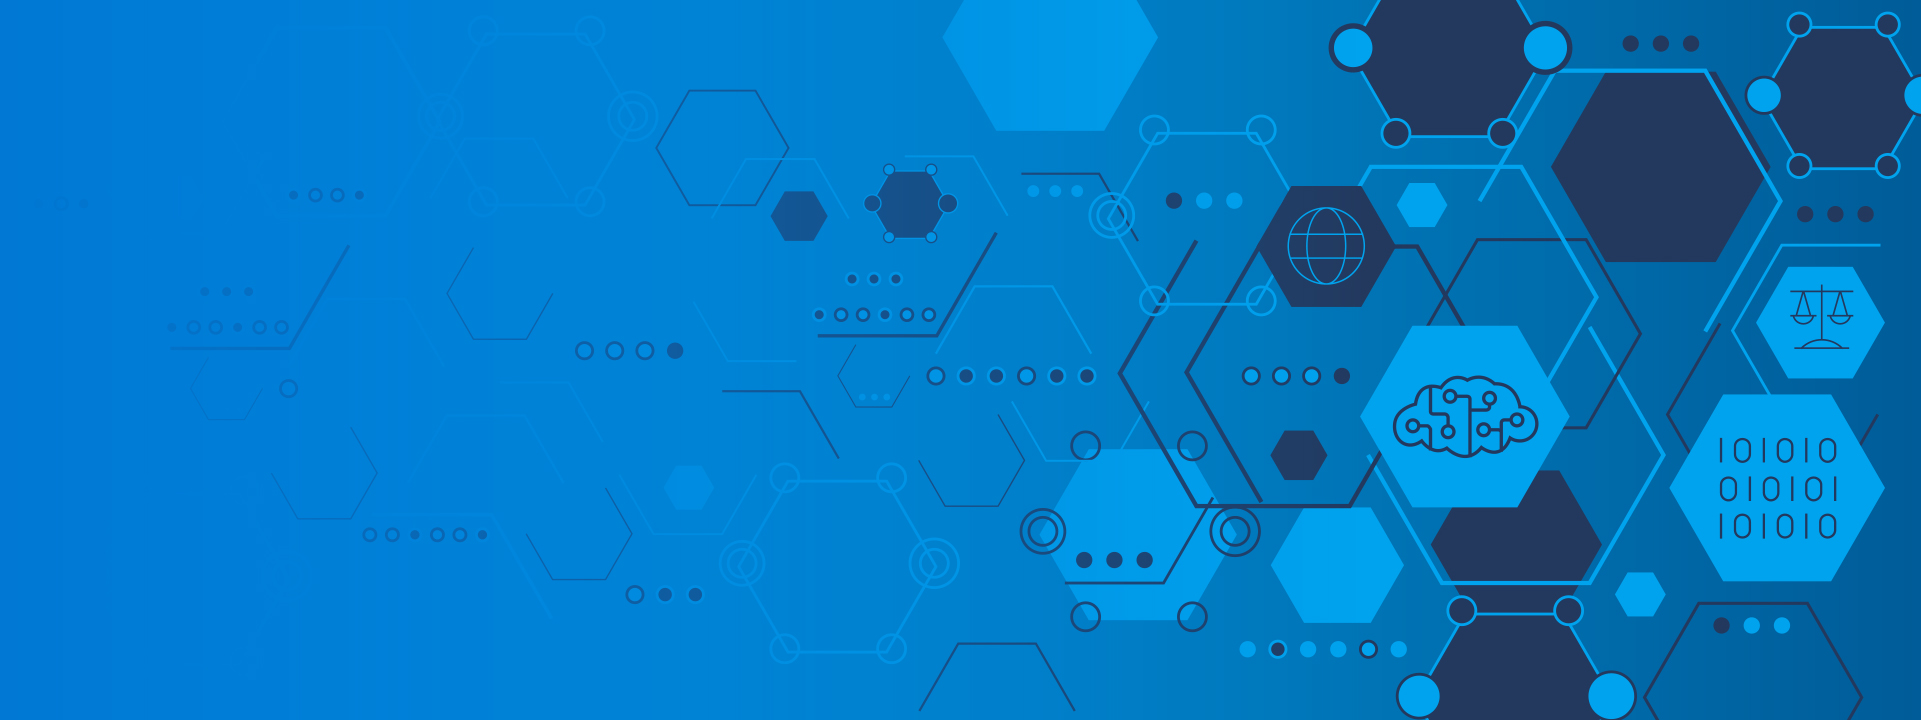

# Librerías usadas en este proyecto.

In [1]:
#----------------  General Data Science / Math Libraries -------------------
import pandas as pd
import numpy as np
import scipy.stats as stats

#---------------- Machine Learning Libraries ------------------------
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler

#----------------  Visualization Libraries  -------------------------
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#----------------  Other Libraries  ----------------------------------
import warnings
warnings.filterwarnings('ignore')

# Carga de datos.

**El conjunto de datos proporcionado es un archivo CSV que contiene historiales médicos verificados de más de 1300 clientes.**

In [2]:
# Extrayendo CSV desde el repositorio de GitHub.
url = "https://raw.githubusercontent.com/CesarAugusto96/ProyectoDS_CesarCaballero/main/insurance.csv"

In [3]:
# Leyendo el CSV con la librería Pandas y almacenandolo en una variable.
Insurance_data = pd.read_csv(url)

In [4]:
# Vistazo parcial del data frame
Insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Descripción de los datos

- **age:** Edad del cliente.
- **sex:** Sexo del cliente.
- **bmi:** Índice de Masa Corporal.
- **children:** Número de hijos.
- **smoker:** indica si el cliente es fumador o no.
- **region:** regíon donde habita el cliente.
- **charges:** el cargo de la tarífa anual del seguro del cliente.

# Tratamiento de los datos.

In [5]:
# Información general de las columnas del data frame.
Insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### Los datos estan bastante limpios, no contiene datos nulos y  contiene tanto datos continuos, como categóricos.

# Exploración de datos continuos.

In [6]:
# Creando una función para conocer los estadísticos de los datos continuos.
def estadisticos_cont(num):
    
# Obteniendo estadísticos de las variables continuas y almacenando en una variable 
# y utilizando el método transpose para colocar los numeros en columnas.
    estadisticos = num.describe().T
    
# Utilizando median para calcular la media del arreglo.
    estadisticos['median'] = num.median()
    
# Formateando para redondearlo a 2 Decimales
    pd.options.display.float_format = '{:.1f}'.format

    return(estadisticos)

In [7]:
# Llamandon a la función para obtener estadísticos de las variable numéricas.
estadisticos_cont(Insurance_data.select_dtypes('number'))

,count,mean,std,min,25%,50%,75%,max,median
age,1338.0,39.2,14.0,18.0,27.0,39.0,51.0,64.0,39.0
bmi,1338.0,30.7,6.1,16.0,26.3,30.4,34.7,53.1,30.4
children,1338.0,1.1,1.2,0.0,0.0,1.0,2.0,5.0,1.0
charges,1338.0,13270.4,12110.0,1121.9,4740.3,9382.0,16639.9,63770.4,9382.0


# - 39 Años es la edad promedio de los usuarios.

# - 1 Es el número de hijos que tienen en promedio.

# - 9382 USD Es lo que pagan en promedio anualmente.


### Veamos la distribución de las variables categóricas.

In [262]:
# Creamos una función para gráficos univariados.
def plot_insurance_data(data, x, 
                        hue, stat="percent", 
                        kde=True,
                        ):
    
  # Creamos la gráfica con la librería seaborn.
    sns.histplot(data=data, x=x, hue=hue, 
                 stat= stat, kde=kde, palette="Set1",
                 )

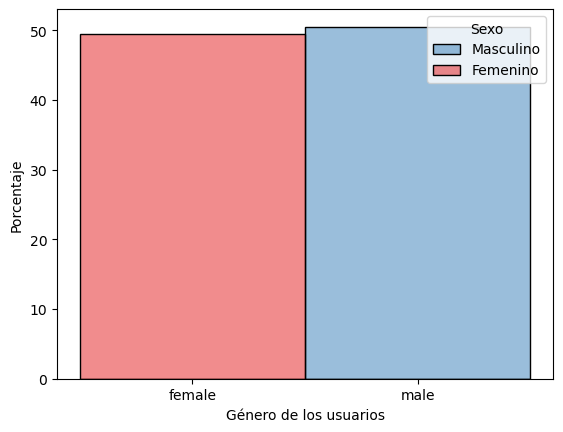

In [263]:
# Llamando a la función.
plot_insurance_data(Insurance_data, 
                    "sex", "sex",stat="percent")

# Estableciendo etiquetas.
plt.legend(title = "Sexo", labels = { "Femenino", "Masculino"})

# Estableciendo Nombre del Eje X y Eje Y.
plt.xlabel("Género de los usuarios")
plt.ylabel("Porcentaje")

# Mostrar gráfico.
plt.show()

**La distribución entre usuarios del género Masculino y Femenino es similar,
con el género masculino con el 51 %, tan solo 2 puntos arriba de las usuarias de género Femenino**

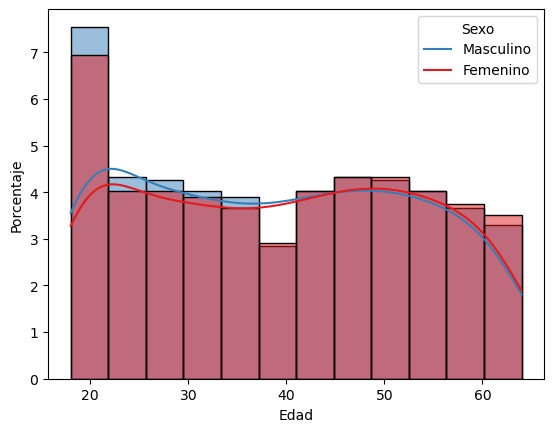

In [264]:
plot_insurance_data(Insurance_data, "age", "sex")

# Estableciendo etiquetas.
plt.legend(title = "Sexo", labels = { "Femenino", "Masculino"})

# Estableciendo Nombre del Eje X y Eje Y.
plt.xlabel("Edad")
plt.ylabel("Porcentaje")

# Mostrar gráfico.
plt.show()

**7% de los Usuarios se encuentran entre los 20 y 22 años. Siendo este el grupo etario más grande.
El resto de los grupos etarios tienen una distribución similar, entre si siendo 39 - 40 años el grupo 
más pequeño con un 3%.**

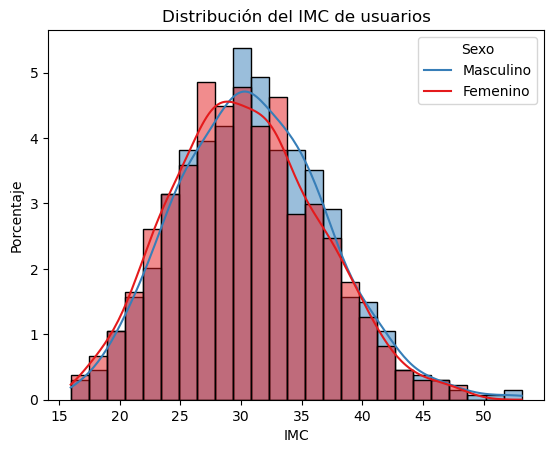

In [265]:
plot_insurance_data(Insurance_data, "bmi", "sex")

# Estableciendo etiquetas.
plt.legend(title = "Sexo", labels = { "Femenino", "Masculino"})

# Estableciendo Nombre del Eje X y Eje Y.
plt.title("Distribución del IMC de usuarios")
plt.xlabel("IMC")
plt.ylabel("Porcentaje")

# Mostrar gráfico.
plt.show()

**El Índice de Masa Corporal por sus siglas en español parece seguir una distribución normal Gaussiana 
con un valor central aproximado de "30", esto indíca que el promedio de los usuarios se encuentran en la categoría de
"Obesidad"**

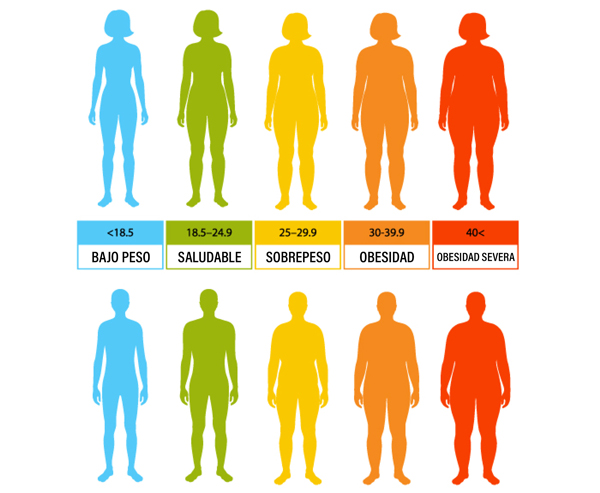

**Como se puede ver en la imágen anterior con datos basados en información de la CDC (Center for Desease Control and Prevention). 
Esto es importante porque los problemas relacionados con la obesidad representan un riesgo grande para la salud.**

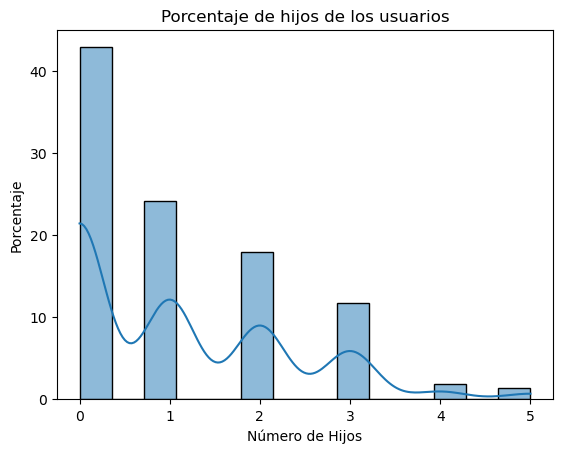

In [283]:
plot_insurance_data(Insurance_data, 
                    "children", hue=None,
                    stat="percent")

# Estableciendo Nombre del Eje X y Eje Y.
plt.title("Porcentaje de hijos de los usuarios")
plt.xlabel("Número de Hijos")
plt.ylabel("Porcentaje")

# Mostrar gráfico.
plt.show()

**Podemos notar que más del 40% los usuarios tienen no tienen hijos, el resto se reparte entre los 
usuarios que tienen de 1 a 5 hijos, siendo 5 el número máximo de hijos de los usuarios**

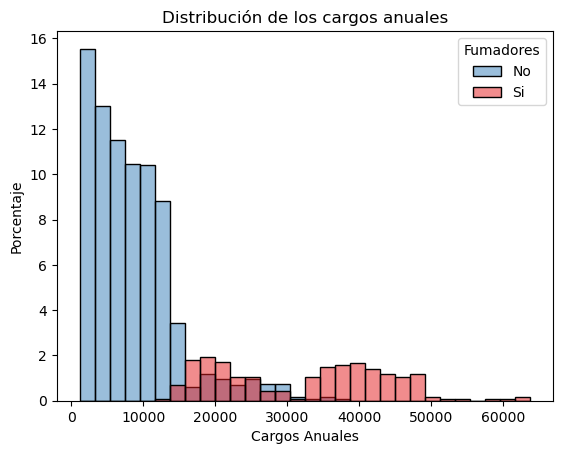

In [284]:
plot_insurance_data(Insurance_data, 
                    "charges", hue="smoker",
                    kde = None, stat="percent")

plt.legend(title="Fumadores", labels=["No", "Si"])

# Estableciendo Nombre del Eje X y Eje Y.
plt.title("Distribución de los cargos anuales")
plt.xlabel("Cargos Anuales")
plt.ylabel("Porcentaje")

# Mostrar gráfico.
plt.show()

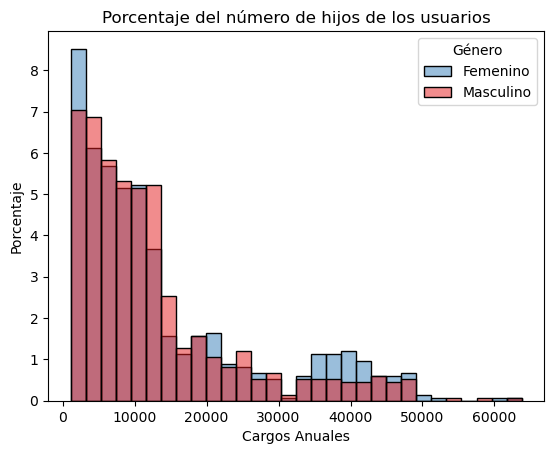

In [268]:
plot_insurance_data(Insurance_data, 
                    "charges", hue="sex",
                    kde = None, stat="percent")

plt.legend(title="Género", labels=["Femenino", "Masculino"])

# Estableciendo Nombre del Eje X y Eje Y.
plt.title("Porcentaje del número de hijos de los usuarios")
plt.xlabel("Cargos Anuales")
plt.ylabel("Porcentaje")

# Mostrar gráfico.
plt.show()

**En lo que respecta a las tarífas más altas, los clientes del género masculino tienden a pagar más que el sexó femenino, si sabemos que los clientes fumadores se encuentran entre los que pagan tarifas más altas, podriamos decir que tal vez los hombres fuman más que las mujeres.**

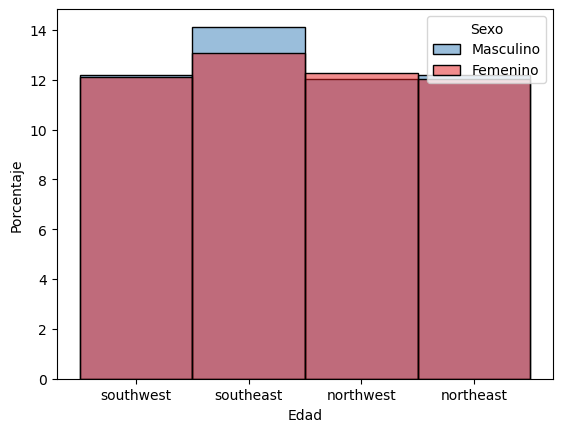

In [269]:
plot_insurance_data(Insurance_data, "region", hue="sex", kde=False)

# Estableciendo etiquetas.
plt.legend(title = "Sexo", labels = { "Femenino", "Masculino"})

# Estableciendo Nombre del Eje X y Eje Y.
plt.xlabel("Edad")
plt.ylabel("Porcentaje")

# Mostrar gráfico.
plt.show()

# Revisando valores atípicos.

**Verifiquemos valores atipicos de las variables "Edad" e "Índice de Masa Corporal"**

In [270]:
# Creando una función para graficar diagramas de caja que muestren los
# valores atípicos.

def plot_boxplots(data, x_vars, 
                  x_labels=None, 
                  y_label="Valores", 

                  figsize=(8, 2)):
    
#  Estableciendo dos gráficos en una misma fila.
    num_vars = len(x_vars)
    f, axs = plt.subplots(1, num_vars, figsize=(figsize[0] * num_vars, figsize[1]), sharey=True)

    # Estableciendo un Loop For para crear dos figuras.
    for i, var in enumerate(x_vars):
        sns.boxplot(data=data, x=var, palette="Set2", ax=axs[i])
        axs[i].figure.set_size_inches(figsize)
        
      # Estableciendo etiquetas del eje X.
        if x_labels:
            axs[i].set_xlabel(x_labels[i])
        else:
            axs[i].set_xlabel(var)

        axs[i].set_ylabel(y_label)
        
# Mostrar gráfico.
    f.tight_layout()
    plt.show()

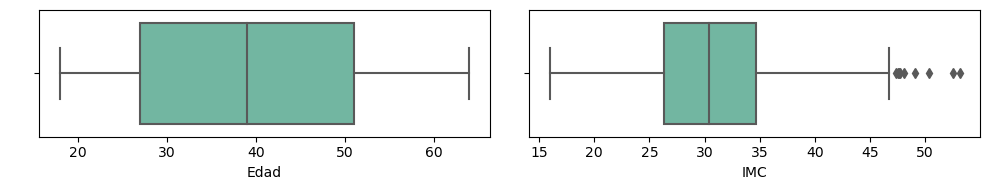

In [271]:
# Llamando a la función para verificar valores atípicos.

plot_boxplots(data=Insurance_data, 
              x_vars=["age", "bmi"],
              x_labels=["Edad", "IMC"], 
              y_label=" ", figsize=(10, 2))

**Ahora verifiquemos los datos atípicos con los datos de "Número de hijos" y "Cargos"**

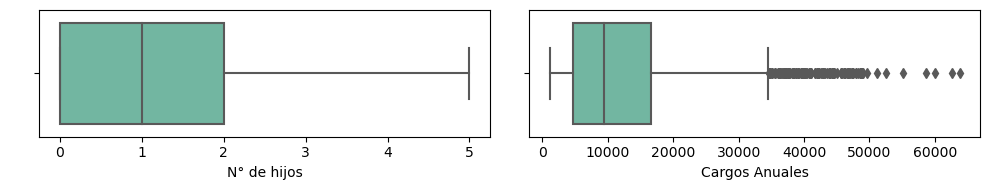

In [272]:
plot_boxplots(data=Insurance_data, 
              x_vars=["children", "charges"],
              x_labels=["N° de hijos", "Cargos Anuales"], 
              y_label=" ", figsize=(10, 2))

# Con este modelo, queremos estimar los cargos anuales de un cliente según sus caracteristicas, por lo que la variable "charges" que es la característica de interés

**Uno de los datos del cuál nos interesa conocer su relación con los cargos anuales, es el de si el cliente es fumador o no, ya que este es unos de las principales características que provocan el deterioro de la salud.**

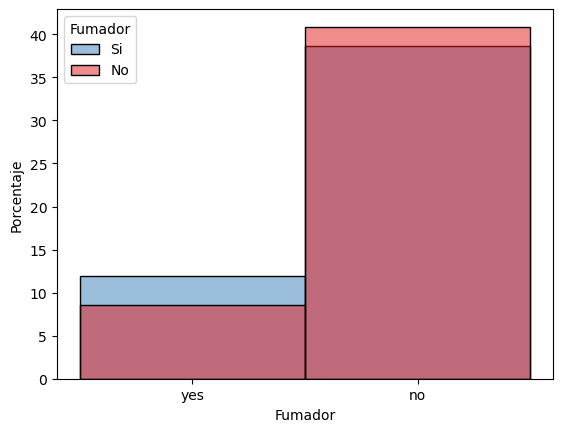

In [279]:
plot_insurance_data(Insurance_data, "smoker", hue="sex", kde=False)

# Estableciendo etiquetas.
plt.legend(title = "Fumador", labels = { "No", "Si"})

# Estableciendo Nombre del Eje X y Eje Y.
plt.xlabel("Fumador")
plt.ylabel("Porcentaje")

# Mostrar gráfico.
plt.show()

**Este gráfico nos muestra la cantidad de fumadores contra la de no fumadores, y podemos darnos cuenta que efectivamente la cantidad de clientes del género masculino, representan la mayoría entre los que tienen el hábito de fumar. Esto nos ayuda a explicar el porque más hombres pagan las tarífas altas.**

**Tambien podemos notar que son más los clientes que no fuman, sin embargo si hay una cantidad de clientes considerable que tienen el hábito de fumar, este hábito, segun la OPS (Organización Panamericana de la Salud), es de las principales causas de enfermedades pulmonares y muertes en ciertas regiones del mundo. 
Es lógico que aquellos clientes que fuman, pagan tarífas mas altas debido a que tienden a requerir más servicios de salud.**

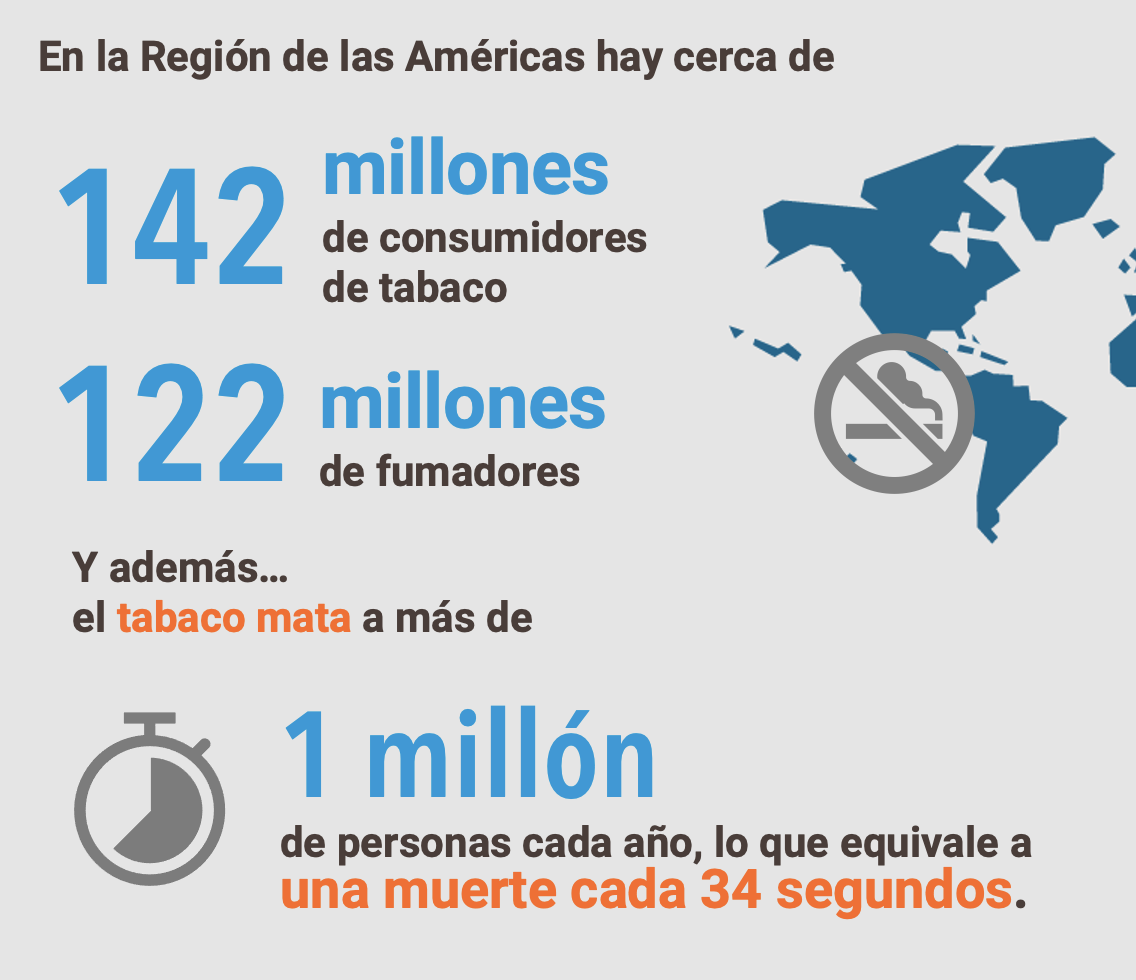

# Ahora es momento de analizar como se comportan las variables respecto a la variable que deseamos predecir, en este caso, el cargo anual.

**Veamos la relación entre la variable "Edad" y "Cargos", utilizando la variable de fumadores para diferenciarlos.**

In [276]:
def insurance_scatterplot(data, x, y,
                         hue):
    
    sns.scatterplot(data=Insurance_data, x=x, y=y, hue=hue, palette="Set1")
    plt.show()

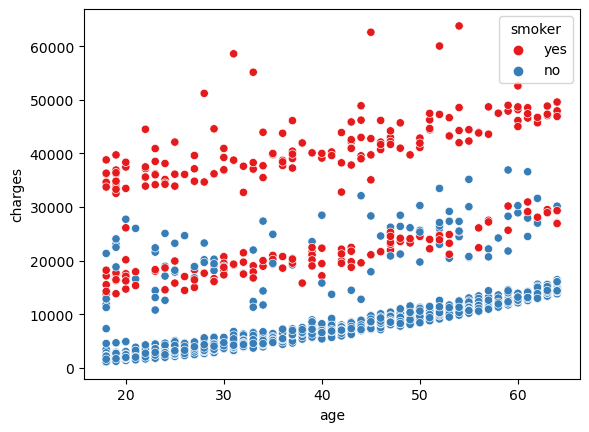

In [277]:
insurance_scatterplot(Insurance_data, 
                      x="age", y="charges", 
                      hue= "smoker")

**Aqui vemos como hay una tendencia positiva entre la edad y los cargos, a medida que los clientes tienen mayor edad, se les hace cargos más altos, en el gráfico podemos notar 3 grupos, el primero de No fumadores, y cuyas tarífas son más bajas, aunque si tienen tendencia ascendente, el segundo grupo muestra una combinación y el tercero son solo clientes que fuman. Estos últimos pagan tarifas más altas.**

**Veamos un gráfico que nos muestre como se comporta el Indice de Masa Corporal respecto a los cargos, diferenciando a los clientes que fuman de los que no fuman.**

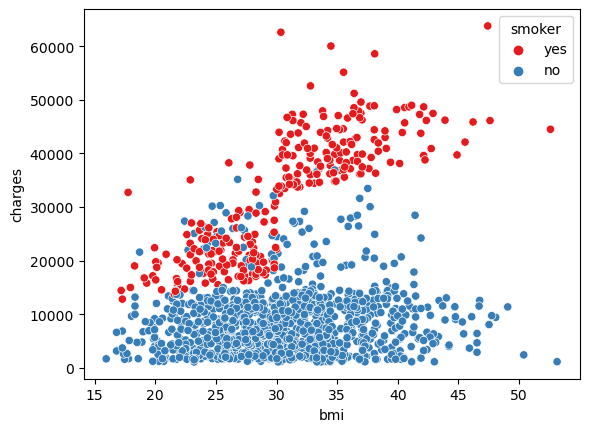

In [281]:
insurance_scatterplot(Insurance_data, 
                      x="bmi", y="charges", 
                      hue= "smoker")

In [282]:
plot_scatter(data=Insurance_data, 
             x_var="bmi", 
             y_var="charges", 
             hue_var="smoker", 
             hue_labels=["No", "Si"], 
             hue_title="Fumador", 
             x_label="IMC", 
             y_label="Cargos Anuales", 
             figsize=(7, 5))

TypeError: plot_scatter() got an unexpected keyword argument 'hue_var'

**Aqui podemos ver que los clientes que a los clientes que fuman, si se le hace un mayor cargo anual, acentuandose cuando pasan el 30 % de IMC, a diferencia de los clientes que no fuman, a estos últimos no se les hace cargos más altos a medida que aumenta su Índice de masa corporal.**

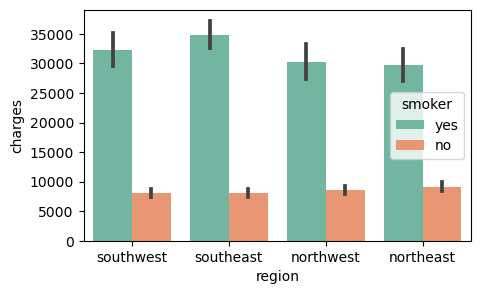

In [23]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.barplot(data = Insurance_data, x = "region" ,
                y = "charges",
                hue = "smoker",
                palette = "Set2")
plt.show()

# Conclusiónes 

- Una de lás variables más importantes al momento de considerar los cargos, es el de los clientes que fuman, ya que despues de hacer la comparativa con las otras variables, podemos notar que aquellos que tienen el hábito de fumar, tienden a pagar tarifas más altas, y se acentúan cuando se comparan con el IMC o la Edad.

- Las características que muestran una mayor relación con la variable que queremos predecir son la de "Edad" y "BMI". aunque por si solas no pueden determinar los cargos totales, podemos verificar el coeficiente de correlación de las variables más importantes (Edad, BMI, Smoker) para un resultado más determinante.

# Selección de Característica.

**Hagamos una gráfica de correlación para saber como se correlacionan las variables continuas respecto a la variable que queremos predecir, en este caso, la variable "charges"**

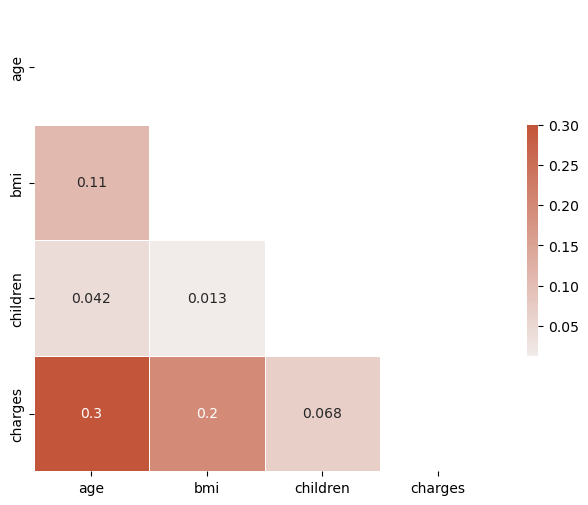

In [24]:
corr = Insurance_data.corr()

mask = np.triu(np.ones_like(corr,dtype = bool))

fig, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(230, 20, as_cmap = True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

**El mapa de correlación nos muestra las variables óptima para el modelo, la cual es la variable "age", la correlación es fuerte sin llegar a ser muy alta (0.30), esto implica que no exista una correlación negativa. 
Las otras variables que podemos usar para nuestro modelo son: bmi y children.**

# Creando el modelo de predición

**Para crear este estimador de cargos, utilizarémos el modelos de Regresión Lineal.**

**Utilizando la fórmula de la pendiente (y = wx + b)**

**Creemos una función para ver como se ajusta la pendiente en nuestro gráfico de "charges" contra "age"**

In [25]:
#Función que nos permite cambiar los valores de la pendiente de la recta.

def try_parameters(w, b):
    ages = Insurance_data.age
    target = Insurance_data.charges

#Función que nos permite graficar la recta.

    def estimate_charges(age, w, b):
        return w * age + b
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

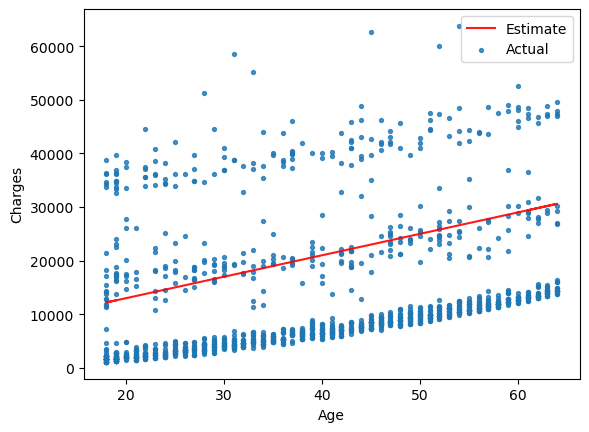

In [26]:
try_parameters(400, 5000)

**Despúes de estimar la recta con parametros dados manualmente, programemos una función que nos permita
automatizar la estimación de la recta nuevos valores, sin tener que hacerlo manual, este será nuestro modelo.**

# Creando nuestro modelo de regresión

In [27]:
#Inicializemos el modelo.

model= LinearRegression()

**A continuación,usaremos el método fit() para encontrar la mejor línea de ajuste para las entradas y los objetivos.**

**Debido a que el método fit() requiere un array de 2 dimenciónes, debemos crear este array, en lugar de solo usar la columna "charges"**

In [28]:
inputs = Insurance_data[['age']]

target = Insurance_data.charges

print(inputs.shape,target.shape)

(1338, 1) (1338,)


**Entrenemos nuestro modelo con el método fit()**

In [29]:
model.fit(inputs, targets)

NameError: name 'targets' is not defined

**Hagamos una prueba de nuestro modelo ingresando algunos valores manuales de "Edad"**

In [ ]:
model.predict(np.array([[19], 
                        [28], 
                        [32]]))

**Comparemos las predicciones con el gráfico de Edad vs Cargos, lo haremos tomando el cuenta el primero grupo, que corresponde a los no fumadores, ya que este dato no se está tomando en cuenta en la estimación.**

In [ ]:
fig, ax = plt.subplots(figsize=(5, 3))

sns.scatterplot(data = Insurance_data, x = "age" ,
                y = "charges",
                hue = "smoker",
                palette = "Set2")
plt.show()

Aunque no es exacto, el modelo predice con una buena estimación para los datos introducidos manualmente (25,46,62)

**Ahora usemos nuestros datos ogirinales de la variable edad, para ver como predice los cargos nuestro modelo.**

In [ ]:
predictions = model.predict(inputs)

In [ ]:
predictions

# Evaluación del modelo.

**Para evaluar este modelo utilizaremos el Error Cuadrático medio**

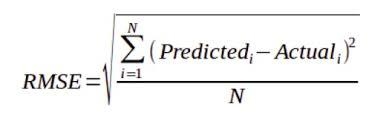

**Veamos la representación visual.**

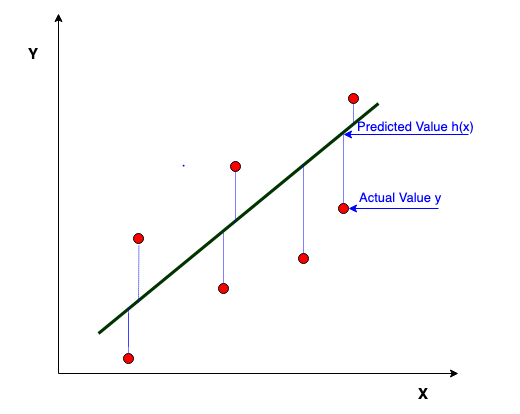

**Utilizando la librería Pandas, podemos crear fácilmente una función que nos calcule este ECM**

In [ ]:
def rmse(targets, predictions):
    
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [ ]:
#Apliquemos la función del ECM para estimar cual es la pérdida promedio de nuestra predicción.

loss = rmse(targets, predictions)

rmse(targets, predictions)

print("Pérdida:",'$',loss)

**La pérdida promedio es de $11551 USD; aunque esto no parece ser tanto, si implica una pérdida significativa.**

**Un factor por el que podría estar fallando nuestro modelo es porque solo estamos coniderando la variable "age" para la estimación. A continuación, haremos más estimaciónes usando las otras variables con coeficiente de correlación.**

In [ ]:
#Hagamos la predicción de los cargos, pero ahora usando la variable, age, bmi y children.

inputs, targets = Insurance_data[['age', 'bmi','children']], Insurance_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$', loss)

**Al incluir estas variables (bmi,children) en la estimación, la pérdida es menor ($11355), sin embargo no lo es tanto como para ser algo representativo.**

**Incluyamos la variable "smoker" que también tiene una gran correlación con los cargos.**

**Como esta variable es de tipo categórica, debemos convertirla a una variable numérica.**

In [ ]:
#Convertir los valores Yes & No en variables numéricas.

smoker_codes = {'no': 0, 'yes': 1}

#Creando una nueva columna con los valores numéricos de la columna smoker
Insurance_data['smoker_code'] = Insurance_data.smoker.map(smoker_codes)

In [ ]:
#Verifiquemos el coeficiente de correlación de la columna smoker.

Insurance_data.charges.corr(Insurance_data.smoker_code)

**Usemos esta variable para hacer la estimación con nuestro modelo.**

In [ ]:
#Agreguemos la varialbe "Smoker" numérica que creamos, en el modelo creado con anterioridad.

inputs, targets = Insurance_data[['age', 'bmi','children','smoker_code']], Insurance_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$',loss)

**Ahora, si, la estimación se redujo considerablemente, pasó de 11355 USD a una pérdida media de 6056 USD.**

**Repitamos el mismo proceso con la caracteristica "sex".**

In [ ]:
#Convertir los valores Yes & No en variables numéricas.

sex_codes = {'no': 0, 'yes': 1}

#Creando una nueva columna con los valores numéricos de la columna smoker
Insurance_data['sex_code'] = Insurance_data.smoker.map(sex_codes)

In [ ]:
#Verifiquemos el coeficiente de correlación de la columna sex.

Insurance_data.charges.corr(Insurance_data.sex_code)

**Incluyamos la variable "sex" en el modelo y veamos su rendimiento.**

In [ ]:
#Agreguemos la varialbe "Sex" numérica que creamos, en el modelo creado con anterioridad.

inputs, targets = Insurance_data[['age', 'bmi','children','smoker_code','sex_code']], Insurance_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$',loss)

**El sexo no parece ser una variable que nos ayude a mejorar la presición del modelo, por eso será descartada.**

In [ ]:
#Quitemos la varialbe "Sex" numérica que creamos, en el modelo creado con anterioridad.

inputs, targets = Insurance_data[['age', 'bmi','children','smoker_code']], Insurance_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$',loss)

**Eliminemos datos atípicos de las variables, charges y bmi, para ver si mejora la presición del modelo.**

In [ ]:
#Eliminando datos atipicos con el método interquantil-

Q1 = Insurance_data["charges"].quantile(0.25)
Q3 = Insurance_data["charges"].quantile(0.75)
IQR = Q3 - Q1

# aplicando la fórmula y almacenandola en un nuevo df
clean_data = Insurance_data[(Insurance_data["charges"] >= Q1 - 1.5 * IQR) & (Insurance_data["charges"] <= Q3 + 1.5 * IQR)]

In [ ]:
#Apliquemos un filtro con los valores z y pongamoslo en una nueva varible.
clean_data

**Se eliminaron 139 filas de datos**

In [ ]:
#Comprobemos como queda las variable  sin los datos atípicos con un diagrama de caja.
f, axs = plt.subplots(1, 2, 
                      figsize=(9, 2), 
                      gridspec_kw=dict(width_ratios=[5, 5]))

sns.boxplot(data = clean_data, 
                x = "charges",
                palette = "Set2",
                ax=axs[0])

f.tight_layout()

**Hagamos una estimación con nuestro modelo usando este nuevo dataframe sin los valores atípicos.**

In [ ]:
#Quitemos la varialbe "Sex" numérica que creamos, en el modelo creado con anterioridad.

inputs, targets = clean_data[['age', 'bmi','children','smoker_code']], clean_data['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Pérdida:','$',loss)

**La pérdida bajó de 6056 USD a 4585 USD, eso significa que hubo una mejora en la presición.**

# Entrenamiento del Modelo.


**Entranaremos el modelo con set de datos de prueba para ver como predice datos nuevos desconocidos.**

In [ ]:
#Usamos los datos para dividirlos en datos de modelado y datos de entrenamiento.

inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.25)

In [ ]:
# Generar la estimación
predictions_train = model.predict(inputs_train)

# Evaluar la pérdida del modelo de entrenamiento para verificar su presición
loss = rmse(targets_train, predictions_train)
print('Pérdidas del Entrenamiento:','$',loss)

# Conclusiones

**Con los datos nuevos que el modelo no conocía, nuestro modelo hizo una estimación muy parecida a la que hizo sin los datos de entrenamiento. esto quiere decir que el modelo está bien entrenado para estimar las tarifas de los nuevos clientes.**

**A pesar de que se ocuparón la mayoría de las variables para crear el modelo y además se quitaron los datos atípicos, la estimación sigue teniendo una pérdida considerable, esto se deba quizá a que la cantidad de datos de la muestra no es suficiente. 
A esto se le llama Underfitting y es un problema con la cantidad de la muestra, que no nos permite entrenar bien nuestro modelo.**

**Posiblemente habría que crear un nuevo modelo con otro método que se adecue a nuestros datos.**